In [1]:
# 한글폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf


In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('/content/drive/MyDrive/빅콘테스트/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_문제데이터.xlsx')
df.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [4]:
df = df.rename(columns = {'REG_DATE':'기준일', 'P_TYPE':'제품구분','CTRY_1':'제조국','CTRY_2':'수출국',
                        'P_PURPOSE':'수입용도','CATEGORY_1':'중분류명 카테고리',
                        'CATEGORY_2':'어종','P_NAME':'상세어종','P_IMPORT_TYPE':'수입형태',
                        'P_PRICE':'target'})

In [5]:
df['month'] = df['기준일'].dt.month
df['year'] = df['기준일'].dt.year
df['day'] = df['기준일'].dt.day

In [6]:
df = df[df['상세어종'] == '연어']

In [7]:
# 제조국 별로 데이터를 살펴봤을 때 노르웨이, 영국을 제외하고 데이터가 100이상인 데이터가 없다.
for i in df.제조국.unique():
  print(f'{i}',len(df[df['제조국'] == i]))

노르웨이 1278
캐나다 51
영국 120
칠레 3
아일랜드 2
미국 5
러시아 11
아이슬란드 3
베트남 1
뉴질랜드 3
호주 12


In [8]:
# 데이터를 보면 12-28일 노르웨이에서 수입형태가 다른 것들이 여러 번 들어왔다. 
# 그러면 수입형태를 나눠서 분석을 진행하지 말고 저 부분을 하나로 살펴봐야 겠다.
df.head()

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day
74,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",12.936815,12,2015,28
129,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",19.146755,12,2015,28
168,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",12.082384,12,2015,28
174,2015-12-28,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.425826,12,2015,28
198,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,냉장,8.844281,12,2015,28


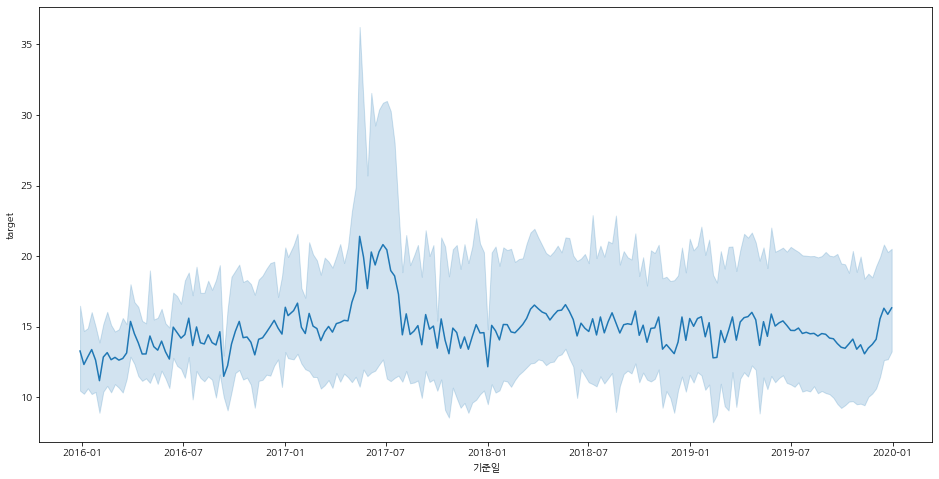

In [9]:
# 2017년 몇개의 데이터를 제외하고 큰 이상치가 나타나진 않는다.
plt.figure(figsize = (16,8))
sns.lineplot(data = df, x = '기준일', y = 'target')

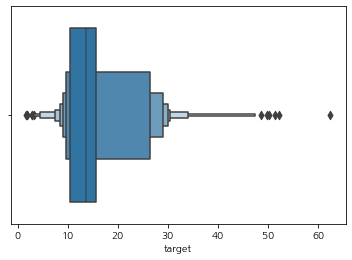

In [10]:
# 이상치도 많이 존재 하는 것으로 보인다.
sns.boxenplot(df['target'])

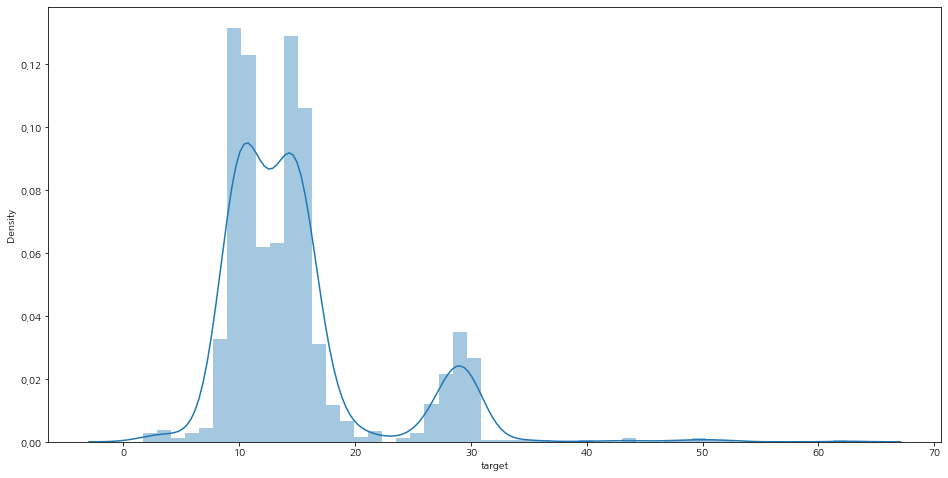

In [11]:
# 분포가 쌍곡분포를 따른다.
plt.figure(figsize = (16,8))
sns.distplot(df['target'])

In [12]:
# 이상치 제거를 IQR 방법을 통해서 제거해 보도록 하자.
def get_outlier(df=None, column=None, weight=4.0):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

delete_index = get_outlier(df = df, column = 'target', weight = 3.0)
print(delete_index)
df_iqr = df.drop(delete_index, axis = 0)

Int64Index([14005, 14240, 14444, 14639, 14834, 15054, 15244, 15449, 15607,
            15663, 15859, 16051, 20171, 26537],
           dtype='int64')


In [13]:
# 노르웨이의 가격 인상으로 인해서 이상치가 생겨났다.
# 대부분의 데이터가 2017년의 데이터라는 걸 확인할 수 있다.
df.loc[delete_index,:]

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day
14005,2017-05-08,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",34.521310,5,2017,8
14240,2017-05-15,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",62.457202,5,2017,15
14444,2017-05-22,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",49.777500,5,2017,22
14639,2017-05-29,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",40.521693,5,2017,29
14834,2017-06-05,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",51.394008,6,2017,5
15054,2017-06-12,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",43.791678,6,2017,12
15244,2017-06-19,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",48.550884,6,2017,19
15449,2017-06-26,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",43.481666,6,2017,26
15607,2017-07-03,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",32.806026,7,2017,3
15663,2017-07-03,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",50.173407,7,2017,3


Text(0.5, 1.0, '이상치 제거를 안했을 때 lineplot')

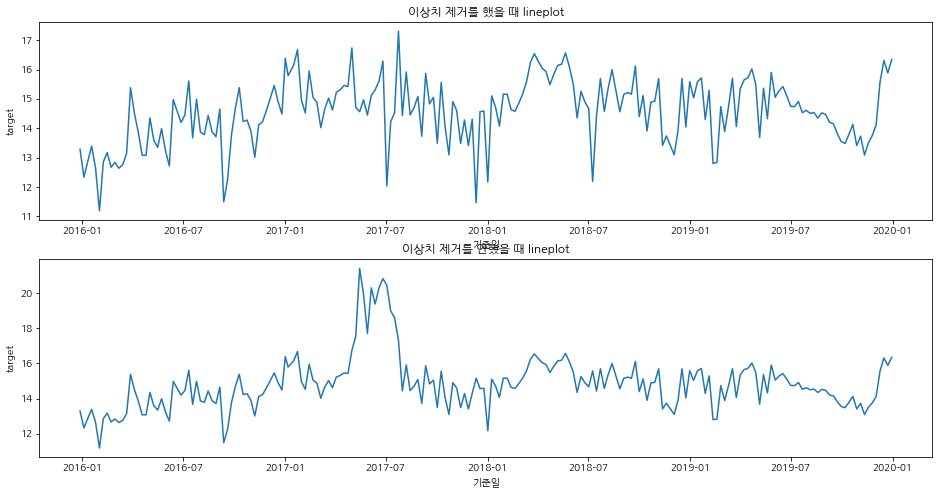

In [14]:
# 이상치 제거를 했을 때와 안했을 때 차이가 있는지 확인해 보자.
plot_data = df_iqr[['기준일','target']].groupby('기준일').mean().reset_index()
plot_data1 = df[['기준일', 'target']].groupby('기준일').mean().reset_index()
plot_data

fig, ax = plt.subplots(nrows = 2, figsize = (16,8))
sns.lineplot(data = plot_data, x = '기준일', y = 'target', ax = ax[0])
sns.lineplot(data = plot_data1, x = '기준일', y = 'target', ax = ax[1])
ax[0].set_title('이상치 제거를 했을 때 lineplot')
ax[1].set_title('이상치 제거를 안했을 때 lineplot')

Text(0.5, 1.0, '이상치를 제거 안했을 때 boxenplot')

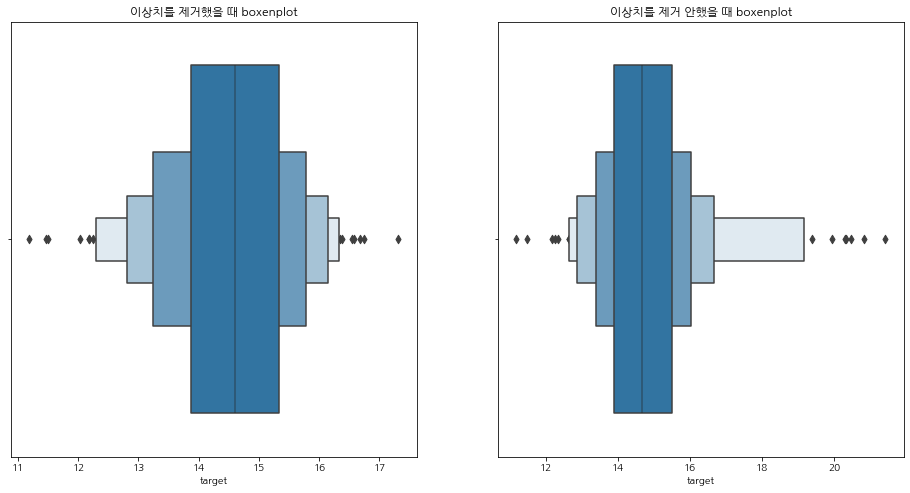

In [15]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.boxenplot(plot_data['target'], ax = ax[0])
sns.boxenplot(plot_data1['target'], ax = ax[1])
ax[0].set_title('이상치를 제거했을 때 boxenplot')
ax[1].set_title('이상치를 제거 안했을 때 boxenplot')

Text(0.5, 1.0, '이상치를 제거 안했을 때 distplot')

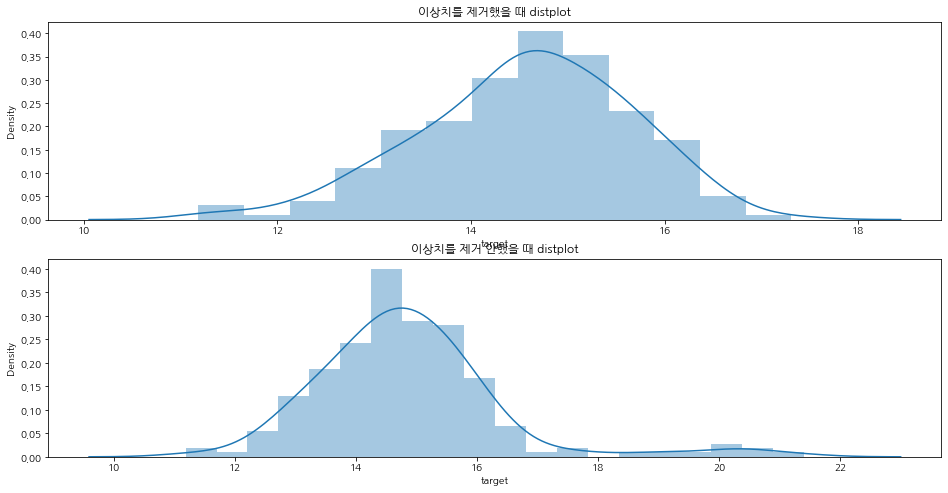

In [16]:
# 이상치를 제거했을 때와 제거를 안했을 때를 비교해보자.
fig, ax = plt.subplots(nrows = 2, figsize = (16,8))
sns.distplot(plot_data['target'], ax = ax[0])
sns.distplot(plot_data1['target'], ax = ax[1])
ax[0].set_title('이상치를 제거했을 때 distplot')
ax[1].set_title('이상치를 제거 안했을 때 distplot')

In [17]:
# 위의 그래프를 보면 이상치를 제거했을 때 log를 정규성이 되지 않을까?
from scipy.stats import shapiro
alpha = 0.05

# 이상치를 제거했을 때 정규성을 띄는 것을 볼 수 있다.
# p_value > 0.05임으로 정규성을 만족한다.
stats, p = shapiro(plot_data['target'])
print('이상치 제거 데이터 :',stats, p)

# 이상치를 제거하고 log를 씌웠을 때 정규성을 만족하지 않는다.
stats, p = shapiro(plot_data['target'].apply(lambda x:np.log1p(x)))
print('이상치 제거 데이터 + log :', stats, p)

# 이상치를 제거하지 않았을 때 정규성을 만족하지 않는다.
stats, p = shapiro(plot_data1['target'])
print('이상치 제거하지 않았을 때 :', stats, p)

# 이상치를 제거하지 않았을 때 정규성을 만족하지 않는다.
stats, p = shapiro(plot_data1['target'].apply(lambda x:np.log1p(x)))
print('이상치 제거하지 않았을 때 + log:', stats, p)

이상치 제거 데이터 : 0.9883154034614563 0.08381788432598114
이상치 제거 데이터 + log : 0.9764614105224609 0.0013710882049053907
이상치 제거하지 않았을 때 : 0.8905965685844421 3.096723572015847e-11
이상치 제거하지 않았을 때 + log: 0.9343797564506531 4.1611492918036674e-08


정규성을 만족하는 것은 이상치를 제거하면 만족한다.

# Modeling

In [18]:
data = pd.get_dummies(df_iqr, columns = ['제조국','수입용도','수입형태','month']).drop(['제품구분','수출국','어종','상세어종','중분류명 카테고리','year','day'], axis = 1)
train = data[data['기준일'] < '2019']
val = data[data['기준일'] > '2019']
train = train.groupby('기준일').mean().reset_index(drop = True)
val = val.groupby('기준일').mean().reset_index(drop = True)

In [19]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 44 kB/s 


In [20]:
# 한번 모델을 돌려볼까? ㅎㅎ
# 모든 모델을 돌려서 rmse를 측정해 보자.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

X_train, y_train = train.drop('target', axis = 1), train['target']
X_val, y_val = val.drop('target', axis = 1), val['target']

models = {'lightgbm':LGBMRegressor(random_state = 42), 'xgboost':XGBRegressor(random_state = 42),'catboost': CatBoostRegressor(random_state = 42),'lr': LinearRegression(),'ridge': Ridge(random_state = 42),'lasso': Lasso(),'rfg':RandomForestRegressor(),'gb':GradientBoostingRegressor()}
model_rmse = {}
for i,j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  RMSE = mean_squared_error(y_val, y_pred) ** 0.5

  model_rmse[i] = RMSE

# 가장 좋은 성능을 내는 모델 찾아서 맞추기
print(sorted(model_rmse.items(), key = lambda item:item[1]))

[05:00:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.028104
0:	learn: 1.1448866	total: 46.3ms	remaining: 46.3s
1:	learn: 1.1371848	total: 47ms	remaining: 23.4s
2:	learn: 1.1302318	total: 47.4ms	remaining: 15.8s
3:	learn: 1.1228985	total: 47.9ms	remaining: 11.9s
4:	learn: 1.1157715	total: 48.3ms	remaining: 9.61s
5:	learn: 1.1083341	total: 48.7ms	remaining: 8.07s
6:	learn: 1.1012156	total: 49.1ms	remaining: 6.97s
7:	learn: 1.0944363	total: 49.7ms	remaining: 6.16s
8:	learn: 1.0874600	total: 50.2ms	remaining: 5.53s
9:	learn: 1.0834205	total: 50.6ms	remaining: 5.01s
10:	learn: 1.0772820	total: 51.1ms	remaining: 4.6s
11:	learn: 1.0710079	total: 51.6ms	remaining: 4.25s
12:	learn: 1.0638218	total: 52.1ms	remaining: 3.96s
13:	learn: 1.0576252	total: 52.6ms	remaining: 3.71s
14:	learn: 1.0517550	total: 53.1ms	remaining: 3.49s
15:	learn: 1.0457829	total: 53.6ms	remaining: 3.3s
16:	learn: 1.0414827	tota

In [21]:
!pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19878 sha256=77cfbdb3c2c9f44302b56b8ab71a5e22c9b5811a55948376a943c8b4cd7114af
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


In [22]:
from vecstack import stacking

def rmse(y, y_pred):
  return np.sqrt(mean_squared_error(y,y_pred))

lgb = LGBMRegressor(random_state =42)
xgb = XGBRegressor(random_state = 42, tree_method = 'gpu_hist')
catboost = CatBoostRegressor(random_state =42, task_type = 'GPU')
rfg = RandomForestRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
lr = LinearRegression()
gb = GradientBoostingRegressor(random_state = 42)

models = [lgb,xgb, catboost, ridge, rfg,]#lr, gb]

S_train, S_test = stacking(models, X_train, y_train, X_val, regression = True, mode = 'oof_pred_bag', metric  = rmse, n_folds =3, random_state = 42)

lgb = LGBMRegressor(random_state = 42)
lgb.fit(S_train, y_train)
y_pred = lgb.predict(S_test)
RMSE = rmse(y_val, y_pred)

print(RMSE)

[05:00:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.059889
0:	learn: 1.0103465	total: 8.7ms	remaining: 8.69s
1:	learn: 0.9878382	total: 16.1ms	remaining: 8.05s
2:	learn: 0.9659112	total: 24.2ms	remaining: 8.03s
3:	learn: 0.9560792	total: 31.9ms	remaining: 7.95s
4:	learn: 0.9388577	total: 37.9ms	remaining: 7.54s
5:	learn: 0.9209143	total: 45.9ms	remaining: 7.61s
6:	learn: 0.9028852	total: 53.3ms	remaining: 7.56s
7:	learn: 0.8969725	total: 58.4ms	remaining: 7.24s
8:	learn: 0.8815027	total: 66.2ms	remaining: 7.29s
9:	learn: 0.8702005	total: 73.9ms	remaining: 7.31s
10:	learn: 0.8633069	total: 81.6ms	remaining: 7.34s
11:	learn: 0.8555698	total: 

In [23]:
from sklearn.ensemble import VotingRegressor

lr = LinearRegression()
lgb = LGBMRegressor(random_state = 42)
cat = CatBoostRegressor(random_state = 42)
xgb = XGBRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
rfg = RandomForestRegressor(random_state = 42)
gb = GradientBoostingRegressor(random_state = 42)


vo_reg = VotingRegressor(estimators = [('lr',lr),('lgb',lgb),('cat',cat),('xgb',xgb),('ridge',ridge),('rfg',rfg),('gb',gb)], n_jobs = 3)
vo_reg.fit(X_train, y_train)
y_pred = vo_reg.predict(X_val)

RMSE = rmse(y_val, y_pred)


print(RMSE)

0.7253850011196898


In [24]:
import statsmodels.api as sm

X = train.drop('target', axis = 1)
y = train['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     4.321
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           4.39e-09
Time:                        05:01:53   Log-Likelihood:                -192.82
No. Observations:                 158   AIC:                             445.6
Df Residuals:                     128   BIC:                             537.5
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
제조국_노르웨이                 3.2305 

[05:01:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Text(0.5, 0, 'Xgboost Feature Importance')

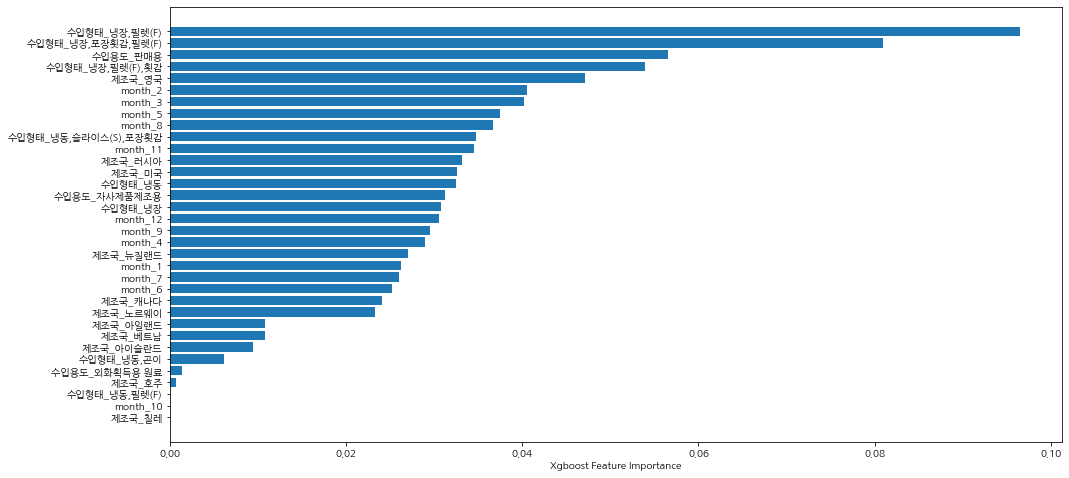

In [25]:
# XGB importance
model = XGBRegressor(random_state =42)
model.fit(train.drop('target', axis = 1), train['target'])

sorted_idx = model.feature_importances_.argsort()

plt.figure(figsize = (16,8))
plt.barh(train.drop('target', axis = 1).columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel('Xgboost Feature Importance')

# 이상치 제거 이후

In [26]:
df.head()

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day
74,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",12.936815,12,2015,28
129,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",19.146755,12,2015,28
168,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",12.082384,12,2015,28
174,2015-12-28,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.425826,12,2015,28
198,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,냉장,8.844281,12,2015,28


Text(0.5, 1.0, '수입용도 count')

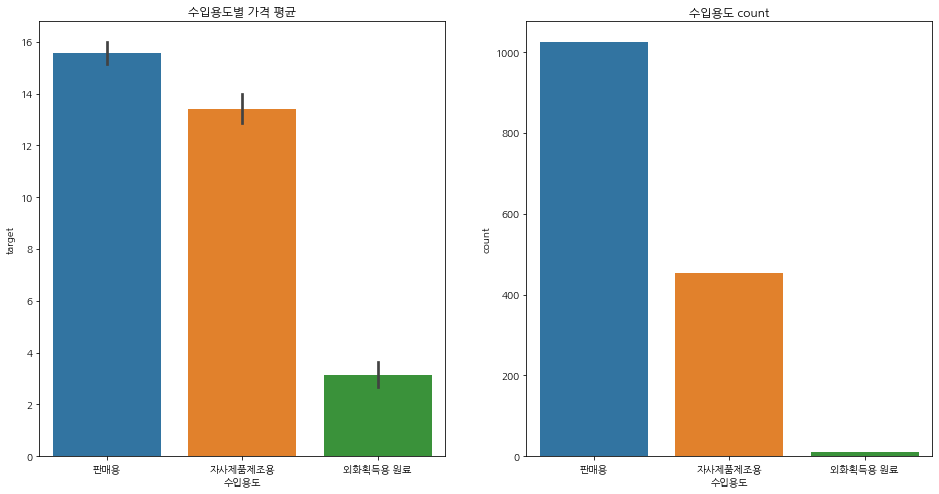

In [29]:
# 이상치를 제거하기 전과 똑같이 분포가 그려지게 된다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = df, x = '수입용도', y = 'target', ax = ax[0])
sns.countplot(df['수입용도'], ax = ax[1])
ax[0].set_title('수입용도별 가격 평균')
ax[1].set_title('수입용도 count')

Text(0.5, 1.0, '제조국별 countplot')

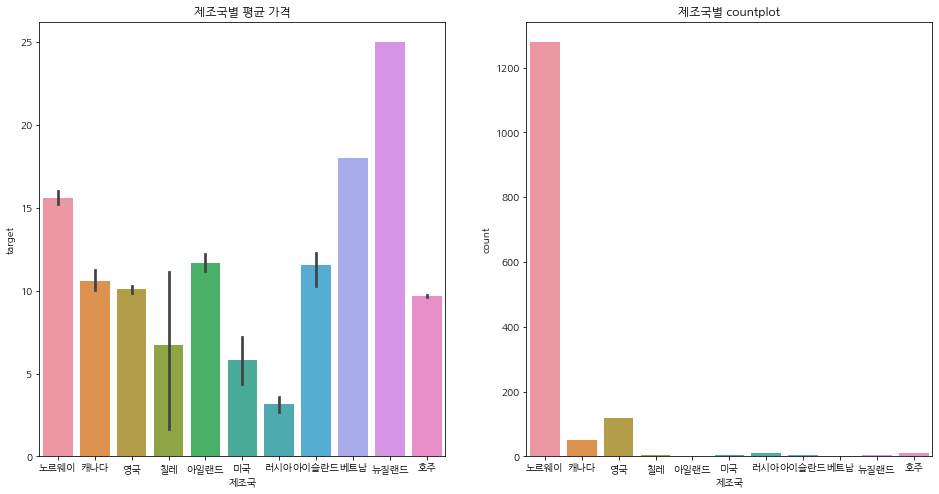

In [31]:
# 가격은 뉴질랜드와 베트남이 높다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = df, x = '제조국', y = 'target', ax = ax[0])
sns.countplot(df['제조국'], ax = ax[1])
ax[0].set_title('제조국별 평균 가격')
ax[1].set_title('제조국별 countplot')

In [33]:
# 베트남은 1곳 뉴질랜드는 3곳이 있다.
df[(df['제조국'] == '뉴질랜드') | (df['제조국'] == '베트남')]

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day
24853,2018-05-14,수산물,베트남,베트남,판매용,어류,연어,연어,"냉동,슬라이스(S),포장횟감",18.0,5,2018,14
26846,2018-07-23,수산물,뉴질랜드,뉴질랜드,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",25.0,7,2018,23
27413,2018-08-13,수산물,뉴질랜드,뉴질랜드,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",25.0,8,2018,13
31110,2018-12-17,수산물,뉴질랜드,뉴질랜드,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",25.0,12,2018,17
